In [ ]:
# https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
url = 'https://github.com/fenago/datasets/raw/main/default_credit.xls'
data = pd.read_excel(url)

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Split the data into features and target variable.
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
600/600 [==============================] - 4s 4ms/step - loss: 0.5131 - accuracy: 0.7766 - val_loss: 0.4704 - val_accuracy: 0.8150
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.4503 - accuracy: 0.8176 - val_loss: 0.4539 - val_accuracy: 0.8175
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8195 - val_loss: 0.4521 - val_accuracy: 0.8167
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.8202 - val_loss: 0.4470 - val_accuracy: 0.8144
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8202 - val_loss: 0.4490 - val_accuracy: 0.8154
Epoch 6/50
600/600 [==============================] - 3s 5ms/step - loss: 0.4303 - accuracy: 0.8219 - val_loss: 0.4456 - val_accuracy: 0.8177
Epoch 7/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4291 - accuracy: 0.8219 - val_loss: 0.4482 - val_accuracy: 0.8200
Epoch 

In [5]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


188/188 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.8120
Test Loss: 0.44735464453697205
Test Accuracy: 0.8119999766349792


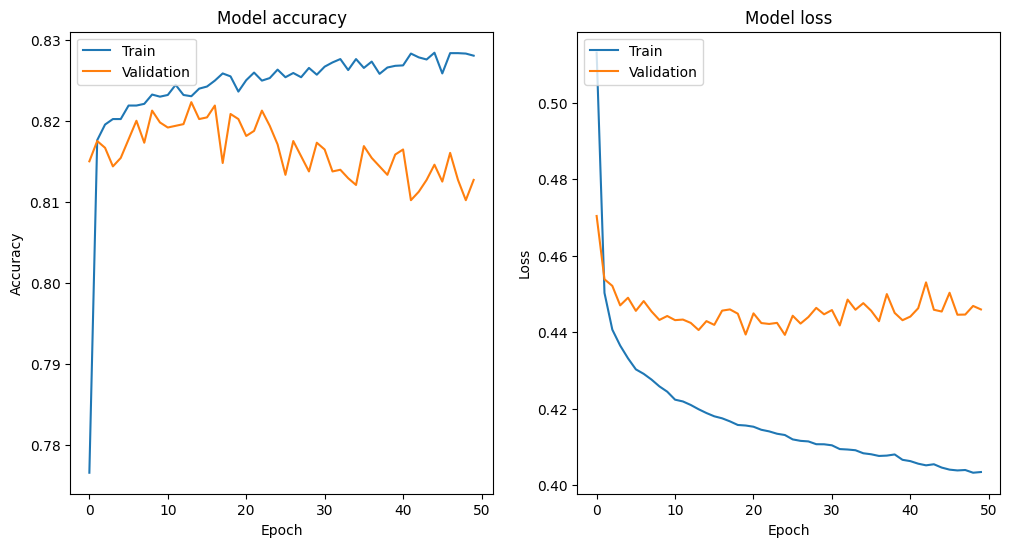

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [7]:
model.save('/content/model')
import joblib
joblib.dump(scaler, '/content/scaler.pkl')

['/content/scaler.pkl']

In [8]:
!zip -r /content/default_model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/keras_metadata.pb (deflated 86%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 22%)
  adding: content/model/variables/variables.index (deflated 60%)
  adding: content/model/saved_model.pb (deflated 87%)
  adding: content/model/fingerprint.pb (stored 0%)


In [9]:
from google.colab import files
files.download('/content/default_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
files.download('/content/scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# I can run this from anywhere... but i choose to do it from here... because it's already up:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_excel('https://github.com/fenago/datasets/raw/main/default_credit.xls')

# Prepare the features and the scaler
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Select a sample from the test set - NOT NEEDED...
sample_index = 10  # You can choose any index from the test set
sample = X_test.iloc[sample_index].tolist()
# sample_scaled = X_test_scaled[sample_index].tolist()

# Define the URL of your microservice
url = "https://4000-fenago-deploy-2k36p8gg3de.ws-us105.gitpod.io/predict"  # Replace with the actual URL of your microservice

# Send a POST request to the microservice
# response = requests.post(url, json={'data': sample_scaled})
response = requests.post(url, json={'data': sample})

# Print the response from the microservice
print("Status Code:", response.status_code)
print("Response JSON:", response.json())

Status Code: 200
Response JSON: [[0.6959414482116699]]
